# Data Mining Project Report

## 1. Problem
In this project, we aim to address the issue of employee attrition (why employees leave a company). This problem is significant because understanding the factors contributing to attrition can help organizations reduce turnover rates, save costs, and improve employee satisfaction.

## 2. Data Mining Tasks
The project involves two main data mining tasks:
- **Classification**: To predict whether an employee is likely to leave based on features such as age, job satisfaction, and workload.
- **Clustering**: To group employees into clusters based on their similarities, identifying patterns that may contribute to attrition.
The goal is to compare the performance of classification and clustering techniques.

## 3. Data


## 4. Data Preprocessing


## 5. Data Mining Techniques


## 6. Evaluation and Comparison

### - Clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv("AfterBalance.csv")

# Convert categorical features to numerical using one-hot encoding
df_d = pd.get_dummies(df, drop_first=True)

# Extract the features (excluding the target variable, if any)
features = df_d.drop('Attrition', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
        Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.550405   0.781210         -1.051326  -0.844301            0.0   
1  0.123354   1.477211         -0.930097  -0.844301            0.0   
2 -0.837510  -1.784493          1.736919   0.131922            0.0   
3  0.016591   1.079129         -0.081501   1.108145            0.0   
4 -0.196934  -0.253803         -0.445185  -1.820523            0.0   

   EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  \
0       -1.708705                -0.550356 -1.215314    1.441610   
1       -1.703590                 1.220354  0.822833    1.341770   
2       -1.678016                 0.334999  0.822833   -0.754872   
3       -1.664376                 0.334999  0.822833    0.842569   
4       -1.657557                -0.550356  0.822833    0.892489   

   JobInvolvement  ...  JobRole_Manager  JobRole_Manufacturing Director  \
0        0.398918  ...        -0.239046                        -0.32323   
1

### the choice for the three different sizes of K-means clustering


We will choose 3 different sizes based on the result of the validation methods that we will apply then we will use these sizes to perform the k-means clustering, one of the numbers should be relatively large, the second should be in the middle and the last should be small. This way we hope that we will cover the possible best outcomes and clustering results.



### Silhouette method


The Silhouette method is a technique used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters. It helps determine the optimal number of clusters in unsupervised learning tasks.



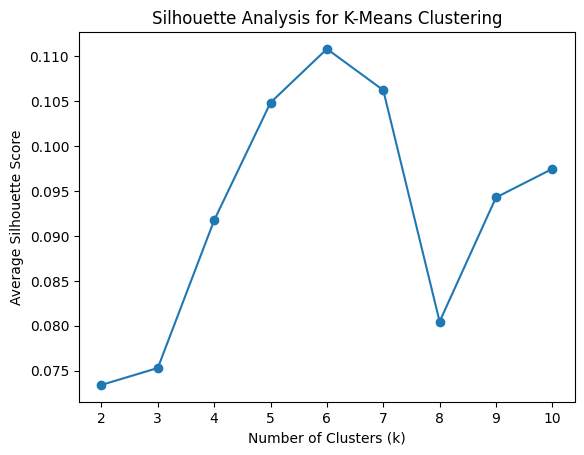

The highest average Silhouette score is 0.11082964666755879 with k=6.
The second highest average Silhouette score is 0.10623620382282285 with k=7.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

The optimal value for k in clustering the data using K-means is k=6, based on the highest Silhouette score. This will be our first choice for performing clustering on our data.

### Elbow method


The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.



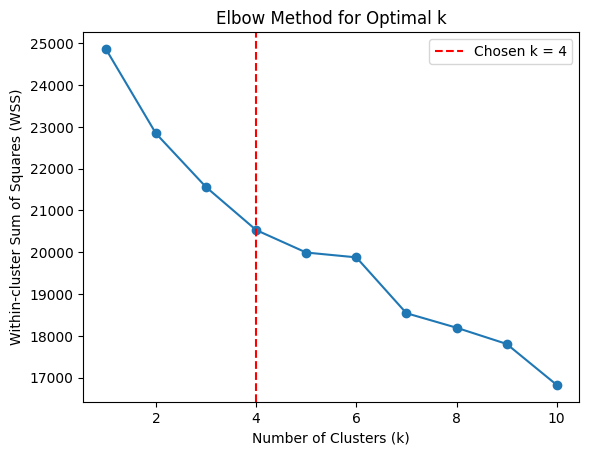

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from kneed import KneeLocator

# Assuming df_scaled is already created and contains numerical data
X = df_scaled

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for different values of k
wss_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto'))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to locate the turning point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


Based on the Elbow Method for determining the optimal number of clusters, the results indicate that the optimal number of clusters is **4**. This is determined by the point of inflection in the plot, where the Within-cluster Sum of Squares (WSS) starts to decrease more slowly after k=4. This suggests that adding more clusters beyond this point will not significantly reduce the variance within the clusters, making **k=4** the best choice for optimal data partitioning.

### k-means clustering, visualization, and evaluation:


In this section, we will perform k-means clustering and visualize its result using three different k’s that have been chosen beforehand, then we will compute WSS and Bcubed preceision and recall and average silhouette for each cluster as methods of evaluating clustering results.


### K=4


- Chosen based on the Elbow method, as it appears to be a turning point with a reasonable drop in within-cluster sum of squares (WSS).


In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AfterBalance.csv")

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 9.87464660e-01 -4.13132433e-01 -3.83628202e-02 -8.15012766e-02
   1.92935908e-01  0.00000000e+00 -1.43216700e-01  1.87440016e-01
  -1.96240460e-01 -2.43135309e-03  1.27561120e-02  1.71752586e+00
  -1.04702594e-01  1.32422483e-01  2.47623489e-01  1.43864985e-01
  -1.32631258e-01  0.00000000e+00  1.15889392e-01  0.00000000e+00
  -8.37290927e-02 -1.34678048e-01 -5.73877720e-03  1.23387247e+00
   1.02443580e+00 -1.48947658e-01  1.59375132e-01  1.65456670e-01
  -1.79014949e-01 -1.42003743e-02 -7.10654284e-02  9.46382832e-02
  -9.32413757e-02  9.83958077e-03 -1.22994407e-01 -4.80384461e-01
   1.23506956e+00  2.46270451e-01  1.10736018e+00 -4.72869274e-01
  -2.86882073e-01 -2.86822088e-01  1.64509519e-01 -1.16853600e-01
  -7.97094170e-01 -6.68904151e-01]
 [-1.91122192e-01  7.99611160e-02  7.42506197e-03  1.57744406e-02
  -3.73424339e-02  0.00000000e+00  2.77193613e-02 -3.62787128e-02
   3.79820245e-02  4.70584469e-04 -2.46892490e-03 -3.32424360e-01
   2.02650181e-02 -2.563

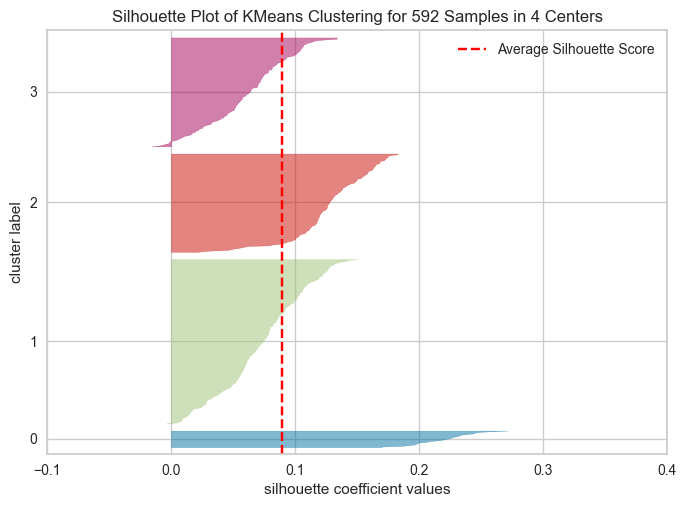

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=4, n_init='auto')  # K-means with 2 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()


---
Based on the silhouette plot for KMeans clustering with 592 samples divided into 4 centers, the fact that most silhouette scores are positive indicates that the samples are well-matched to their clusters and are distant from neighboring clusters. This suggests that the clustering solution has effectively separated the data points into distinct and well-defined clusters.

However, it is important to note that while having mostly positive silhouette scores is a positive indicator, it does not necessarily imply that the clustering solution is "perfect" or without flaws. There may still be some degree of overlap or ambiguity between clusters, especially if there are samples, as shown in the first center, with silhouette scores close to 0 or even negative values.

---

### K=6 


This value corresponds to the highest average Silhouette score, indicating strong cluster cohesion and separation.


In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=6
kmeans = KMeans(n_clusters=6, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 1.12447313e+00 -5.15946918e-01 -1.31326237e-01 -5.76531397e-02
   1.31921989e-01  0.00000000e+00 -2.23117029e-01  3.02048439e-02
  -2.12946579e-01  9.94972443e-02  1.28815819e-01  2.04648303e+00
  -1.67604441e-01  1.96883586e-01  2.95287000e-01  1.42084120e-01
  -2.09932144e-01  0.00000000e+00  1.72031956e-01  0.00000000e+00
   1.12715346e-02 -1.99820386e-02  1.75964080e-01  1.12629014e+00
   8.06716470e-01 -2.66312114e-01  1.58631515e-01  2.26237451e-01
  -2.57194592e-01 -1.59230427e-02 -5.60929308e-03  1.05662806e-01
  -1.16217350e-01 -9.37912945e-02 -1.82095616e-01 -4.80384461e-01
   2.08087341e+00 -3.23229968e-01  1.86570573e+00 -4.98944033e-01
  -5.56537971e-01 -2.86822088e-01  1.72079374e-01 -1.99841893e-01
  -7.97094170e-01 -6.68904151e-01]
 [ 2.63035362e-01 -5.27936133e-01 -4.08080279e-02 -9.86752475e-02
   1.88868314e-01  0.00000000e+00  1.39973478e-01  2.75975513e-01
  -7.73485788e-02 -2.72873708e-02  4.42211881e-02  3.32759056e-01
   5.24762402e-02  5.989

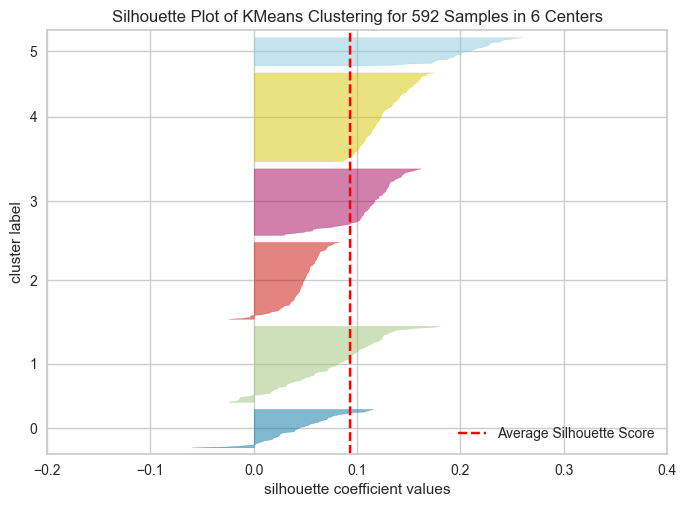

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 592 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Assuming df_scaled is your scaled data
kmeans = KMeans(n_clusters=6, n_init='auto')  # K-means with 6 clusters
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the model and visualize
visualizer.fit(df_scaled)
visualizer.show()

---
Based on the silhouette plot for KMeans clustering with 592 samples divided into 6 centers, the fact that most silhouette scores are positive indicates that the samples are well-matched to their clusters and are distant from neighboring clusters. This suggests that the clustering solution has effectively separated the data points into distinct and well-defined clusters.

However, it is important to note that while having mostly positive silhouette scores is a positive indicator, it does not necessarily imply that the clustering solution is "perfect" or without flaws. There may still be some degree of overlap or ambiguity between clusters, especially if there are samples, as shown in some centers, with silhouette scores close to 0 or even negative values.

---



In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 18995.167205329
Average Silhouette Score: 0.10896548942610029



---

**WSS (Within-cluster Sum of Squares):** 18995.17 – This relatively high value indicates that the clusters may not be perfectly compact, suggesting a degree of dispersion or spread within the clusters. There may be overlap or a lack of clear separation between some of the clusters.

**Average Silhouette Score:** 0.109 – This relatively average silhouette score suggests that the clustering solution is somewhat effective. While some data points may be well-clustered, there is a possibility of overlap or ambiguity in cluster assignments. This implies that adjusting the number of clusters or using alternative techniques might improve the results and lead to more distinct and well-defined clusters.

---


### K=7


- The second highest average Silhouette score, providing an alternative with potentially meaningful clustering.


In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=7
kmeans = KMeans(n_clusters=7, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result 
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[ 8.66586717e-01 -6.60074864e-01 -1.32251256e-03  1.05003384e-01
   2.44563071e-01  0.00000000e+00 -2.05736553e-01  9.66343781e-02
  -2.74630711e-01 -1.82711482e-01  2.93301371e-01  1.81470512e+00
  -1.60888692e-01  1.21335711e-01  3.79389848e-01  1.35508620e-01
  -1.20033812e-01  0.00000000e+00 -3.63995298e-02  0.00000000e+00
   1.37755195e-01  3.18120642e-02  3.24196768e-01  7.55986219e-01
   3.07407915e-01 -3.19311226e-01  4.07113872e-01  7.69023959e-01
  -7.08899197e-01  1.32915504e-01 -3.63223301e-01  1.46368736e-01
  -2.01724130e-03  1.23854863e-02 -1.82095616e-01 -4.80384461e-01
  -2.39045722e-01 -3.23229968e-01  4.66575083e+00 -4.98944033e-01
  -5.56537971e-01 -2.86822088e-01  1.22531228e-01 -2.65596896e-01
  -7.97094170e-01 -6.68904151e-01]
 [ 2.96413050e-01 -4.71425829e-01 -5.12619942e-02 -8.54118582e-02
   1.55540280e-01  0.00000000e+00  1.36257906e-01  2.77879502e-01
  -4.83104697e-02 -1.61358790e-02  2.24447718e-02  3.76481218e-01
   3.45811168e-02  3.670


---

From the silhouette plot of KMeans clustering with 592 samples divided into 7 centers, we observe that most of the silhouette scores are positive, indicating that many samples are well-matched to their respective clusters and are sufficiently distant from neighboring clusters. The separation between clusters appears reasonable, with clear distinction in some clusters, while others may experience slight overlap or ambiguity at the boundaries.

The average silhouette score reflects a certain level of effectiveness in clustering; however, the presence of some samples with silhouette scores close to 0 or negative suggests potential overlap or unclear separation between a few clusters. This implies that there is room for improvement in the clustering solution, either by adjusting the number of clusters or exploring alternative clustering techniques to reduce overlap and enhance cluster distinctiveness.

---



In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 18498.951342865512
Average Silhouette Score: 0.10390905122421978



---

**WSS (Within-cluster Sum of Squares):** 18498.95 - While relatively high, this result indicates that the clustering process has effectively created multiple clusters and achieved meaningful grouping of diverse data points. The resulting clusters highlight variations between points and offer a comprehensive view of the data structure, which can be valuable for various analytical contexts.

**Average Silhouette Score:** 0.104 - This score reflects that many data points have been well-assigned to their respective clusters, demonstrating benefits in classifying and segmenting data into defined groups. It suggests that the clustering process has managed to organize a significant portion of the data logically and reasonably, with room for further improvement in fine-tuning the separation between clusters.

---



---

### Evaluate the best models of Clustering:

|               | K=4         | K=6         | K=7         |
|---------------|-------------|-------------|-------------|
| **WSS**       | 20726.43    | 18995.17    | 18498.95    |
| **Average Silhouette Score** | 0.0906     | 0.109       | 0.104       |

---

**Evaluation Summary:**

After analyzing the new clustering results, we've determined that **K=6** is the best choice for our clustering model. This conclusion is based on the combination of the **Silhouette Score** and **WSS** values. Although **K=4** has a slightly higher silhouette score, **K=6** demonstrates a better balance between compactness and separation, with a relatively low WSS of 18995.17, indicating well-defined clusters.

Additionally, the **Silhouette Score** for **K=6** of **0.109** indicates that the clusters are reasonably well-separated. Therefore, we choose **K=6** as the optimal number of clusters for this dataset.

## 7. Findings


## 8. References
- IBM HR Analytics Dataset: Kaggle
